In [12]:
import kwant
import numpy as np
import matplotlib.pyplot as plt
import tinyarray
%matplotlib inline
import scipy

In [2]:
template = kwant.continuum.discretize('k_x * A(x) * k_x')
print(template)

# Discrete coordinates: x

# Onsite element:
def onsite(site, A):
    (x, ) = site.pos
    _const_0 = (A(0.5 + x))
    _const_1 = (A(-0.5 + x))
    return (1.0*_const_0 + 1.0*_const_1)

# Hopping from (1,):
def hopping_1(site1, site2, A):
    (x, ) = site1.pos
    _const_0 = (A(0.5 + x))
    return (-1.0*_const_0)


In [3]:
hami = "k_x**2 + k_y**2 + V(x,y)"
template = kwant.continuum.discretize(hami)

In [4]:
print(template)

# Discrete coordinates: x y

# Onsite element:
def onsite(site, V):
    (x, y, ) = site.pos
    _const_0 = (V(x, y))
    return (_const_0 + 4.0)

# Hopping from (1, 0):
(-1+0j)

# Hopping from (0, 1):
(-1+0j)


In [7]:
def stadium(site):
    (x,y) = site.pos
    x = max(abs(x)- 20, 0)
    return x**2 + y**2 < 30**2
syst = kwant.Builder()
syst.fill(template, stadium,(0,0))
syst = syst.finalized()

In [13]:
def plot_eigenstate(syst,n=2,Vx=.0003,Vy=.0005):
    def potential(x,y):
        return Vx*x + Vy*y
    ham = syst.hamiltonian_submatrix(params = dict(V=potential), sparse = True)
    evecs = scipy.sparse.linalg.eigsh(ham,k=10,which='SM')[1]
    kwant.plotter.map(syst,abs(evecs[:,n])**2,show = False)

C:\Users\caidi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: The plotted data contains 1.13% of values overflowing upper limit 0.00115214 
  


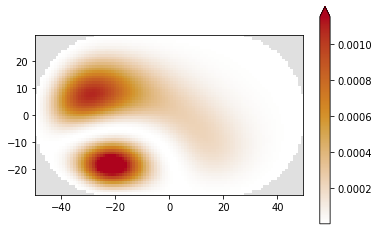

In [14]:
plot_eigenstate(syst)